# Make figures

In [1]:
import os
import re
import pandas as pd
import numpy as np
import glob
from skimage.io import imsave, imread
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle

## Model selection

In [2]:
pat = re.compile("for conf_thresh = ([\d\.]+), precision = (\-?[na\d\.]+), recall = ([\d\.]+), F1-score = (\-?[na\d\.]+)\s+for conf_thresh = ([\d\.]+), TP = ([\d]+), FP = ([\d]+), FN = ([\d]+), average IoU = ([\d\.]+) %\s+IoU threshold = 50 %, used Area-Under-Curve for each unique Recall\s+mean average precision \(mAP@0.50\) = ([\d\.]+),")
models = ["yolov2", "yolov3", "yolov4",
          "yolov2_ft", "yolov3_ft", "yolov4_ft",
          "yolov2_gray", "yolov3_gray", "yolov4_gray"]
data = list()
for model in models:
    for i in range(1000, 11000, 1000):
        filename = "results/{}_{}.txt".format(model, i)
#         print(filename)
        txt = open(filename, "r").read()
        try:
            results = pat.search(txt).groups()
        except AttributeError:
            print("cannot process {}".format(filename))
            continue
        results2 = list()
        for j, r in enumerate(results):
            if r == "-nan":
                results2.append(-np.nan)
            else:
                results2.append(float(r))
        data.append(dict(model=model, arch=model[0:6], seen=i, precision=results2[1], recall=results2[2],
                         F1=results2[3], TP=results2[5], FP=results2[6], FN=results2[7], IOU=0.01*results2[8],
                         mAP=results2[9]))
df = pd.DataFrame(data)
df["TP rate"] = 0.01 * df["TP"]
df
    

model    arch   seen  precision  recall    F1    TP    FP     FN  \
0        yolov2  yolov2   1000        NaN    0.00   NaN   0.0   0.0  100.0   
1        yolov2  yolov2   2000       0.30    0.23  0.26  23.0  53.0   77.0   
2        yolov2  yolov2   3000       0.38    0.47  0.42  47.0  78.0   53.0   
3        yolov2  yolov2   4000       0.45    0.51  0.48  51.0  62.0   49.0   
4        yolov2  yolov2   5000       0.51    0.59  0.55  59.0  57.0   41.0   
..          ...     ...    ...        ...     ...   ...   ...   ...    ...   
85  yolov4_gray  yolov4   6000       0.67    0.06  0.11   6.0   3.0   94.0   
86  yolov4_gray  yolov4   7000       0.68    0.19  0.30  19.0   9.0   81.0   
87  yolov4_gray  yolov4   8000       0.61    0.17  0.27  17.0  11.0   83.0   
88  yolov4_gray  yolov4   9000       0.70    0.19  0.30  19.0   8.0   81.0   
89  yolov4_gray  yolov4  10000       0.60    0.27  0.37  27.0  18.0   73.0   

       IOU       mAP  TP rate  
0   0.0000  0.003627     0.00  
1   0.1970  0.162609     0.23  
2   0.2364  0.309670     0.47  
3   0.2928  0.447162     0.51  
4   0.3325  0.489308     0.59  
..     ...       ...      ...  
85  0.4500  0.054756     0.06  
86  0.4519  0.189654     0.19  
87  0.4502  0.171660     0.17  
88  0.4960  0.165598     0.19  
89  0.4172  0.199910     0.27  

[90 rows x 12 columns]

In [3]:
df.sort_values(by="IOU", ascending=False).head(10)

model    arch   seen  precision  recall    F1    TP    FP    FN  \
25     yolov4  yolov4   6000       0.84    0.57  0.68  57.0  11.0  43.0   
24     yolov4  yolov4   5000       0.84    0.46  0.59  46.0   9.0  54.0   
27     yolov4  yolov4   8000       0.84    0.56  0.67  56.0  11.0  44.0   
29     yolov4  yolov4  10000       0.84    0.36  0.50  36.0   7.0  64.0   
22     yolov4  yolov4   3000       0.82    0.75  0.79  75.0  16.0  25.0   
23     yolov4  yolov4   4000       0.79    0.46  0.58  46.0  12.0  54.0   
26     yolov4  yolov4   7000       0.77    0.68  0.72  68.0  20.0  32.0   
28     yolov4  yolov4   9000       0.75    0.68  0.71  68.0  23.0  32.0   
18     yolov3  yolov3   9000       0.74    0.64  0.68  64.0  23.0  36.0   
45  yolov3_ft  yolov3   6000       0.75    0.58  0.66  58.0  19.0  42.0   

       IOU       mAP  TP rate  
25  0.6005  0.567391     0.57  
24  0.5974  0.515881     0.46  
27  0.5930  0.532932     0.56  
29  0.5847  0.350350     0.36  
22  0.5786  0.715216     0.75  
23  0.5676  0.491358     0.46  
26  0.5586  0.587121     0.68  
28  0.5475  0.588675     0.68  
18  0.5329  0.543783     0.64  
45  0.5244  0.595943     0.58

In [4]:
df.sort_values(by="TP", ascending=False).head(10)

model    arch   seen  precision  recall    F1    TP    FP    FN  \
22       yolov4  yolov4   3000       0.82    0.75  0.79  75.0  16.0  25.0   
9        yolov2  yolov2  10000       0.61    0.69  0.64  69.0  45.0  31.0   
26       yolov4  yolov4   7000       0.77    0.68  0.72  68.0  20.0  32.0   
28       yolov4  yolov4   9000       0.75    0.68  0.71  68.0  23.0  32.0   
8        yolov2  yolov2   9000       0.67    0.67  0.67  67.0  33.0  33.0   
19       yolov3  yolov3  10000       0.74    0.66  0.70  66.0  23.0  34.0   
18       yolov3  yolov3   9000       0.74    0.64  0.68  64.0  23.0  36.0   
49    yolov3_ft  yolov3  10000       0.74    0.64  0.68  64.0  23.0  36.0   
16       yolov3  yolov3   7000       0.74    0.62  0.67  62.0  22.0  38.0   
68  yolov2_gray  yolov2   9000       0.55    0.62  0.58  62.0  50.0  38.0   

       IOU       mAP  TP rate  
22  0.5786  0.715216     0.75  
9   0.4054  0.631886     0.69  
26  0.5586  0.587121     0.68  
28  0.5475  0.588675     0.68  
8   0.4548  0.580131     0.67  
19  0.5130  0.559182     0.66  
18  0.5329  0.543783     0.64  
49  0.5030  0.552470     0.64  
16  0.5204  0.593064     0.62  
68  0.3574  0.533792     0.62

In [5]:
df.sort_values(by="precision", ascending=False).head(10)

model    arch   seen  precision  recall    F1    TP    FP    FN  \
29       yolov4  yolov4  10000       0.84    0.36  0.50  36.0   7.0  64.0   
27       yolov4  yolov4   8000       0.84    0.56  0.67  56.0  11.0  44.0   
25       yolov4  yolov4   6000       0.84    0.57  0.68  57.0  11.0  43.0   
24       yolov4  yolov4   5000       0.84    0.46  0.59  46.0   9.0  54.0   
22       yolov4  yolov4   3000       0.82    0.75  0.79  75.0  16.0  25.0   
23       yolov4  yolov4   4000       0.79    0.46  0.58  46.0  12.0  54.0   
77  yolov3_gray  yolov3   8000       0.77    0.23  0.35  23.0   7.0  77.0   
26       yolov4  yolov4   7000       0.77    0.68  0.72  68.0  20.0  32.0   
21       yolov4  yolov4   2000       0.76    0.48  0.59  48.0  15.0  52.0   
59    yolov4_ft  yolov4  10000       0.76    0.59  0.66  59.0  19.0  41.0   

       IOU       mAP  TP rate  
29  0.5847  0.350350     0.36  
27  0.5930  0.532932     0.56  
25  0.6005  0.567391     0.57  
24  0.5974  0.515881     0.46  
22  0.5786  0.715216     0.75  
23  0.5676  0.491358     0.46  
77  0.4992  0.286274     0.23  
26  0.5586  0.587121     0.68  
21  0.5229  0.540047     0.48  
59  0.5150  0.574177     0.59

In [6]:
df.sort_values(by="mAP", ascending=False).head(10)

model    arch   seen  precision  recall    F1    TP    FP    FN  \
22       yolov4  yolov4   3000       0.82    0.75  0.79  75.0  16.0  25.0   
9        yolov2  yolov2  10000       0.61    0.69  0.64  69.0  45.0  31.0   
44    yolov3_ft  yolov3   5000       0.74    0.58  0.65  58.0  20.0  42.0   
84  yolov4_gray  yolov4   5000       0.67    0.58  0.62  58.0  28.0  42.0   
45    yolov3_ft  yolov3   6000       0.75    0.58  0.66  58.0  19.0  42.0   
43    yolov3_ft  yolov3   4000       0.74    0.58  0.65  58.0  20.0  42.0   
16       yolov3  yolov3   7000       0.74    0.62  0.67  62.0  22.0  38.0   
28       yolov4  yolov4   9000       0.75    0.68  0.71  68.0  23.0  32.0   
26       yolov4  yolov4   7000       0.77    0.68  0.72  68.0  20.0  32.0   
69  yolov2_gray  yolov2  10000       0.69    0.61  0.65  61.0  28.0  39.0   

       IOU       mAP  TP rate  
22  0.5786  0.715216     0.75  
9   0.4054  0.631886     0.69  
44  0.4988  0.628276     0.58  
84  0.4550  0.603904     0.58  
45  0.5244  0.595943     0.58  
43  0.5085  0.595568     0.58  
16  0.5204  0.593064     0.62  
28  0.5475  0.588675     0.68  
26  0.5586  0.587121     0.68  
69  0.4560  0.584027     0.61

In [8]:
fig = px.line(df, x="seen", y="mAP", line_group="model", color="arch",
              render_mode="svg")
fig.show()


In [9]:
fig = px.line(df, x="seen", y="TP", line_group="model", color="arch",
              render_mode="svg")
fig.show()


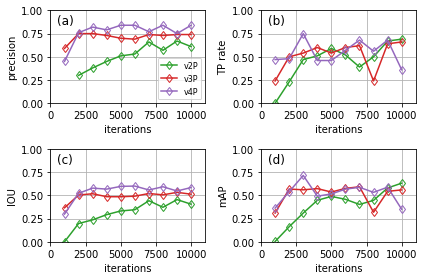

In [11]:
labels = "abcd"

fig = plt.figure()
fig.set_size_inches(6, 4)
for j, c in enumerate(["precision", "TP rate", "IOU", "mAP"]):
    plt.subplot(2, 2, j+1)
    for i in range(2, 5):
        my_df = df.query("model == 'yolov{}'".format(i))
        plt.plot(my_df["seen"], my_df[c], "C{}d-".format(i), label="v{}P".format(i), fillstyle="none")
#     for i in range(2, 5):
#         my_df = df.query("model == 'yolov{}_ft'".format(i))
#         plt.plot(my_df["seen"], my_df[c], "C{}^".format(i), fillstyle="none")
#     for i in range(2, 5):
#         my_df = df.query("model == 'yolov{}_gray'".format(i))
#         plt.plot(my_df["seen"], my_df[c], "C{}o".format(i), fillstyle="none")
    plt.grid()
    if j == 0:
        plt.legend(loc="lower right", ncol=1, fontsize=8)
    plt.xlim([0, 11000])
    plt.ylim([0, 1.0])
    plt.xlabel("iterations")
    plt.ylabel(c)
    plt.text(500, 0.85, "({})".format(labels[j]), fontsize=12)
fig.tight_layout()
plt.savefig("val_vs_iters_p.png", dpi=300)

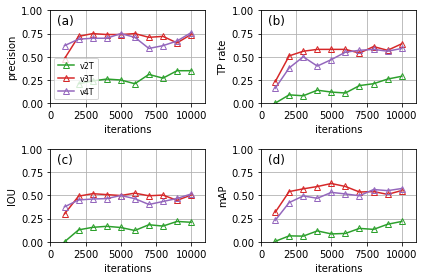

In [12]:


fig = plt.figure()
fig.set_size_inches(6, 4)
for j, c in enumerate(["precision", "TP rate", "IOU", "mAP"]):
    plt.subplot(2, 2, j+1)
#     for i in range(2, 5):
#         my_df = df.query("model == 'yolov{}'".format(i))
#         plt.plot(my_df["seen"], my_df[c], "C{}d-".format(i), label="YOLOv{}".format(i), fillstyle="none")
    for i in range(2, 5):
        my_df = df.query("model == 'yolov{}_ft'".format(i))
        plt.plot(my_df["seen"], my_df[c], "C{}^-".format(i), fillstyle="none", label="v{}T".format(i))
#     for i in range(2, 5):
#         my_df = df.query("model == 'yolov{}_gray'".format(i))
#         plt.plot(my_df["seen"], my_df[c], "C{}o".format(i), fillstyle="none")
    plt.grid()
    if j == 0:
        plt.legend(loc="lower left", ncol=1, fontsize=8)
    plt.xlim([0, 11000])
    plt.ylim([0, 1.0])
    plt.xlabel("iterations")
    plt.ylabel(c)
    plt.text(500, 0.85, "({})".format(labels[j]), fontsize=12)
fig.tight_layout()
plt.savefig("val_vs_iters_t.png", dpi=300)

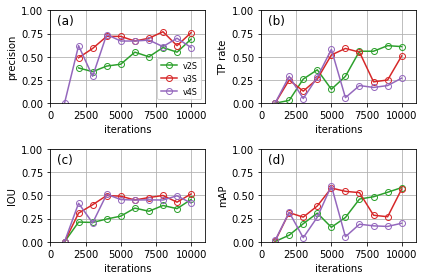

In [13]:

fig = plt.figure()
fig.set_size_inches(6, 4)
for j, c in enumerate(["precision", "TP rate", "IOU", "mAP"]):
    plt.subplot(2, 2, j+1)
#     for i in range(2, 5):
#         my_df = df.query("model == 'yolov{}'".format(i))
#         plt.plot(my_df["seen"], my_df[c], "C{}d-".format(i), label="YOLOv{}".format(i), fillstyle="none")
#     for i in range(2, 5):
#         my_df = df.query("model == 'yolov{}_ft'".format(i))
#         plt.plot(my_df["seen"], my_df[c], "C{}^-".format(i), fillstyle="none", label="YOLOv{}".format(i))
    for i in range(2, 5):
        my_df = df.query("model == 'yolov{}_gray'".format(i))
        plt.plot(my_df["seen"], my_df[c], "C{}o-".format(i), fillstyle="none", label="v{}S".format(i))
    plt.grid()
    if j == 0:
        plt.legend(loc="lower right", ncol=1, fontsize=8)
    plt.xlim([0, 11000])
    plt.ylim([0, 1.0])
    plt.xlabel("iterations")
    plt.ylabel(c)
    plt.text(500, 0.85, "({})".format(labels[j]), fontsize=12)
fig.tight_layout()
plt.savefig("val_vs_iters_s.png", dpi=300)

## Test

In [70]:
df_det = pd.read_csv("results/bmi260_yolov4_3000_test_valid.txt", delimiter=" ", names=["id", "score", "x", "y", "w", "h"])
df_det

id     score           x           y           w           h
0     0  0.982402  137.300064  260.327942  198.650955  326.764404
1     0  0.015580    7.630195  351.058105   37.971474  473.549866
2     1  0.692327  362.574005  164.783905  385.640045  193.301544
3     1  0.006063  361.576141  163.204788  374.598785  185.891434
4     1  0.005276   88.105164  201.537109   94.424530  207.660858
..   ..       ...         ...         ...         ...         ...
418  99  0.014710  347.944885  378.990051  375.487671  400.153259
419  99  0.002284  135.310577  304.394531  347.218201  490.749634
420  99  0.002013   93.435768  336.867249  258.013794  453.023987
421  99  0.001350  322.893524  353.559235  403.784332  430.874908
422  99  0.001079  126.409348  372.649078  179.080948  413.747833

[423 rows x 6 columns]

In [71]:
df_test = pd.read_csv((os.path.join("/Users/liponan/Data/bmi260/rsna2017_{}.csv".format("test"))), index_col=0).reset_index(drop=True)
df_test

order  anatomy                                          seriesUID  \
0     543    Renal  1.3.6.1.4.1.14519.5.2.1.9203.4004.110735590476...   
1     879     Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.165238942760...   
2    1943  Ovarian  1.3.6.1.4.1.14519.5.2.1.3671.4007.116995303901...   
3    1312    Liver  1.3.6.1.4.1.14519.5.2.1.1079.4008.175603378993...   
4     749    Renal  1.3.6.1.4.1.14519.5.2.1.9203.4004.842878075401...   
..    ...      ...                                                ...   
95   2164     Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.292908361479...   
96   2343  Ovarian  1.3.6.1.4.1.14519.5.2.1.9203.4007.132173138503...   
97   2321    Renal  1.3.6.1.4.1.14519.5.2.1.3671.4004.356092246849...   
98   1996  Ovarian  1.3.6.1.4.1.14519.5.2.1.7695.4007.115512319570...   
99    848     Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.310287824798...   

       patientID                                        instanceUID  \
0   TCGA-BP-5190  1.3.6.1.4.1.14519.5.2.1.9203.4004.648273628888...   
1   TCGA-17-Z027  1.3.6.1.4.1.14519.5.2.1.7777.9002.290713132198...   
2   TCGA-30-1891  1.3.6.1.4.1.14519.5.2.1.3671.4007.555778573716...   
3   TCGA-G3-A7M5  1.3.6.1.4.1.14519.5.2.1.1079.4008.336279410752...   
4   TCGA-BP-4777  1.3.6.1.4.1.14519.5.2.1.9203.4004.188592111525...   
..           ...                                                ...   
95  TCGA-17-Z021  1.3.6.1.4.1.14519.5.2.1.7777.9002.270910281152...   
96  TCGA-13-0911  1.3.6.1.4.1.14519.5.2.1.9203.4007.152299569110...   
97  TCGA-CZ-4857  1.3.6.1.4.1.14519.5.2.1.3671.4004.299548659525...   
98  TCGA-09-0364  1.3.6.1.4.1.14519.5.2.1.7695.4007.261190187873...   
99  TCGA-17-Z020  1.3.6.1.4.1.14519.5.2.1.7777.9002.101177667362...   

        length     start_x     start_y       end_x       end_y  ...  \
0    48.764658  133.798895  293.825414  200.556906  293.825414  ...   
1    16.514420  374.240884  190.859668  371.977901  163.138122  ...   
2    28.269811  201.270729  289.686314  183.368631  329.582418  ...   
3   167.389110  160.302468  116.592654  127.653116  338.558266  ...   
4    22.827715  184.716022  255.920442  179.624309  231.027624  ...   
..         ...         ...         ...         ...         ...  ...   
95   15.764489  419.164835  330.093906  398.705295  318.329670  ...   
96  175.939088  131.535912  218.581216  345.953591  213.489503  ...   
97   70.028898   95.328177  340.782320  192.636464  329.467403  ...   
98  145.022935  262.137862  104.015984  264.183816  299.404595  ...   
99   16.175782  344.999001  384.311688  361.366633  403.236763  ...   

                  SOPClassUID sliceIndexOneBased  \
0   1.2.840.10008.5.1.4.1.1.2                 65   
1   1.2.840.10008.5.1.4.1.1.2                 30   
2   1.2.840.10008.5.1.4.1.1.2                 66   
3   1.2.840.10008.5.1.4.1.1.2                 18   
4   1.2.840.10008.5.1.4.1.1.2                 92   
..                        ...                ...   
95  1.2.840.10008.5.1.4.1.1.2                 19   
96  1.2.840.10008.5.1.4.1.1.2                 51   
97  1.2.840.10008.5.1.4.1.1.2                 73   
98  1.2.840.10008.5.1.4.1.1.2                 50   
99  1.2.840.10008.5.1.4.1.1.2                 14   

                                             filename     PatientID  \
0   /Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-519...  TCGA-BP-5190   
1   /Users/liponan/Data/TCIA/TCGA-LUAD/TCGA-17-Z02...  TCGA-17-Z027   
2   /Users/liponan/Data/TCIA/TCGA-OV/TCGA-30-1891/...  TCGA-30-1891   
3   /Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-G3-A7M...  TCGA-G3-A7M5   
4   /Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-477...  TCGA-BP-4777   
..                                                ...           ...   
95  /Users/liponan/Data/TCIA/TCGA-LUAD/TCGA-17-Z02...  TCGA-17-Z021   
96  /Users/liponan/Data/TCIA/TCGA-OV/TCGA-13-0911/...  TCGA-13-0911   
97  /Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-CZ-485...  TCGA-CZ-4857   
98  /Users/liponan/Data/TCIA/TCGA-OV/TCGA-09-0364/...  TCGA-09-0364   
99  /Users/lipo

In [72]:
df_test.query("anatomy == 'Lung'")

order anatomy                                          seriesUID  \
1     879    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.165238942760...   
30   1469    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.145585001968...   
34    724    Lung  1.3.6.1.4.1.14519.5.2.1.6450.9002.175925371425...   
43    474    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.144528617248...   
45   1744    Lung  1.3.6.1.4.1.14519.5.2.1.6450.9002.846229601736...   
47    897    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.424378845950...   
53   1449    Lung  1.3.6.1.4.1.14519.5.2.1.3983.9002.130748219459...   
56    475    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.145585001968...   
66   1394    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.279128212985...   
69    464    Lung  1.3.6.1.4.1.14519.5.2.1.6450.9002.234712957644...   
70    461    Lung  1.3.6.1.4.1.14519.5.2.1.6450.9002.151711845036...   
83    916    Lung  1.3.6.1.4.1.14519.5.2.1.6450.9002.846229601736...   
86   2078    Lung  1.3.6.1.4.1.14519.5.2.1.8421.9002.242757498548...   
88    111    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.310287824798...   
91    164    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.143429533155...   
92    128    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.325132334581...   
95   2164    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.292908361479...   
99    848    Lung  1.3.6.1.4.1.14519.5.2.1.7777.9002.310287824798...   

       patientID                                        instanceUID  \
1   TCGA-17-Z027  1.3.6.1.4.1.14519.5.2.1.7777.9002.290713132198...   
30  TCGA-17-Z059  1.3.6.1.4.1.14519.5.2.1.7777.9002.623895475996...   
34  TCGA-50-5066  1.3.6.1.4.1.14519.5.2.1.6450.9002.237720526572...   
43  TCGA-17-Z038  1.3.6.1.4.1.14519.5.2.1.7777.9002.340909013784...   
45  TCGA-50-6591  1.3.6.1.4.1.14519.5.2.1.6450.9002.178923388443...   
47  TCGA-17-Z023  1.3.6.1.4.1.14519.5.2.1.7777.9002.845499921251...   
53  TCGA-J2-A4AD  1.3.6.1.4.1.14519.5.2.1.3983.9002.915426068539...   
56  TCGA-17-Z059  1.3.6.1.4.1.14519.5.2.1.7777.9002.623895475996...   
66  TCGA-17-Z050  1.3.6.1.4.1.14519.5.2.1.7777.9002.820918339878...   
69  TCGA-50-5941  1.3.6.1.4.1.14519.5.2.1.6450.9002.211045751642...   
70  TCGA-50-6590  1.3.6.1.4.1.14519.5.2.1.6450.9002.315542288073...   
83  TCGA-50-6591  1.3.6.1.4.1.14519.5.2.1.6450.9002.790485128686...   
86  TCGA-38-A44F  1.3.6.1.4.1.14519.5.2.1.8421.9002.151760871748...   
88  TCGA-17-Z020  1.3.6.1.4.1.14519.5.2.1.7777.9002.549953412585...   
91  TCGA-17-Z060  1.3.6.1.4.1.14519.5.2.1.7777.9002.769158406560...   
92  TCGA-17-Z015  1.3.6.1.4.1.14519.5.2.1.7777.9002.620988934212...   
95  TCGA-17-Z021  1.3.6.1.4.1.14519.5.2.1.7777.9002.270910281152...   
99  TCGA-17-Z020  1.3.6.1.4.1.14519.5.2.1.7777.9002.101177667362...   

       length     start_x     start_y       end_x       end_y  ...  \
1   16.514420  374.240884  190.859668  371.977901  163.138122  ...   
30  29.961385  400.304539  310.857979  410.799414  349.838946  ...   
34  23.787279   91.300699  317.818182  130.685315  316.283716  ...   
43  33.768687  102.117127  322.112707  145.113812  347.005525  ...   
45  21.995612  223.752486  326.638674  214.134807  347.005525  ...   
47  18.030636  364.057459  208.397790  380.464088  228.198895  ...   
53  17.607624  342.957540  268.128843  336.585652  284.995608  ...   
56  27.341224  406.488398  314.192265  413.277348  350.400000  ...   
66  21.434497  165.178799  364.862191  139.126502  382.954064  ...   
69  26.611245  185.847514  241.776796  213.003315  239.513812  ...   
70  19.548957  184.150276  349.834254  197.728177  335.124862  ...   
83  49.628515  338.598895  303.443094  303.522652  340.216575  ...   
86  24.254505  193.794392  333.971963  212.934579  352.514019  ...   
88  38.478781  327.480520  319.246753  362.389610  367.454545  ...   
91  23.663958  125.312707  168.229834  164.914917  176.150276  ...   
92  48.905434  315.332667  346.973027  388.475525  374.081918  ...   
95  15.764489  419.164835  330.093906  398.705295  318.329670  ...   
99  16.175782  344.999001

anatomy Renal
detection results: 1


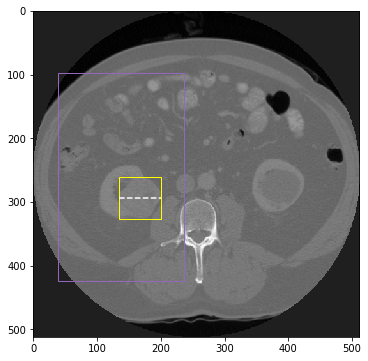

In [73]:
id = 0 # 0, 6, 91, 67; 
s_cutoff = 0.25
img = imread("~/Data/bmi260/test/{}.png".format(str(id).zfill(6)))
lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/test/{}.txt".format(str(id).zfill(6))).read().split()
lw = 512 * float(lw)
lh = 512 * float(lh)
lx = 512 * float(lx) - 0.5*lw
ly = 512 * float(ly) - 0.5*lh
fig = plt.figure()
fig.set_size_inches(6, 6)
plt.imshow(img, cmap=cm.gray)
ax = plt.gca()
rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
ax.add_patch(rect)
xs, xe, ys, ye, anatomy = df_test.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
print("anatomy", anatomy)
plt.plot([xs, xe], [ys, ye], "w--")
my_df = df_det.query("id == {} and score > {}".format(id, s_cutoff))
print("detection results:", len(my_df))
for i in range(len(my_df)):
    _, s, x, y, w, h = my_df.iloc[i]
    if s < s_cutoff:
        continue
    x = x - 0.5*w
    y = y - 0.5*h
    rect = Rectangle((x, y), w, h, fill=None, ec="C4")
    ax.add_patch(rect)


anatomy Renal
anatomy Ovarian
anatomy Lung
anatomy Liver


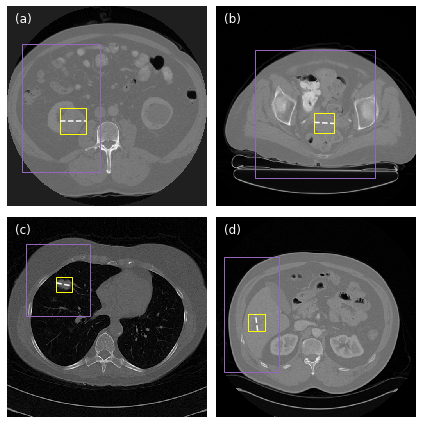

In [74]:
ids = [0, 6, 91, 67]
labels = "abcd"

fig = plt.figure()
fig.set_size_inches(6, 6)
for i, id in enumerate(ids):
    img = imread("~/Data/bmi260/test/{}.png".format(str(id).zfill(6)))
    lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/test/{}.txt".format(str(id).zfill(6))).read().split()
    lw = 512 * float(lw)
    lh = 512 * float(lh)
    lx = 512 * float(lx) - 0.5*lw
    ly = 512 * float(ly) - 0.5*lh
    my_df = df_det.query("id == {}".format(id))
    plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap=cm.gray)
    plt.text(20, 40, "({})".format(labels[i]), color="white", fontsize=12)
    plt.axis("off")
    ax = plt.gca()
    rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
    ax.add_patch(rect)
    xs, xe, ys, ye, anatomy = df_test.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
    print("anatomy", anatomy)
    plt.plot([xs, xe], [ys, ye], "w--")
    for j in range(len(my_df)):
        _, s, x, y, w, h = my_df.iloc[j]
        if s < s_cutoff:
            continue
        x = x - 0.5*w
        y = y - 0.5*h
        rect = Rectangle((x, y), w, h, fill=None, ec="C4")
        ax.add_patch(rect)
fig.tight_layout()
plt.savefig("select_test_results.png", dpi=300)

anatomy Renal
anatomy Ovarian


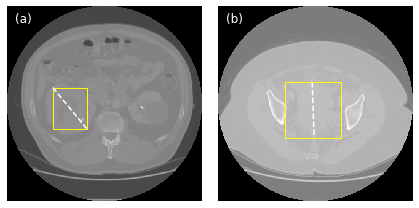

In [75]:
ids = [30, 90]
labels = "abcd"

fig = plt.figure()
fig.set_size_inches(6, 3)
for i, id in enumerate(ids):
    img = imread("~/Data/bmi260/val/{}.png".format(str(id).zfill(6)))
    lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/val/{}.txt".format(str(id).zfill(6))).read().split()
    lw = 512 * float(lw)
    lh = 512 * float(lh)
    lx = 512 * float(lx) - 0.5*lw
    ly = 512 * float(ly) - 0.5*lh
    my_df = df_det.query("id == {}".format(id))
    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap=cm.gray)
    plt.text(20, 40, "({})".format(labels[i]), color="white", fontsize=12)
    plt.axis("off")
    ax = plt.gca()
    rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
    ax.add_patch(rect)
    xs, xe, ys, ye, anatomy = df_val.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
    print("anatomy", anatomy)
    plt.plot([xs, xe], [ys, ye], "w--")
#     plt.arrow(xs, ys, xe-xs, ye-ys, color="white", linewidth=2,
#               width=2, head_width=30, head_length=20, shape="full", linestyle=":")
fig.tight_layout()
plt.savefig("select_val_data.png", dpi=300)

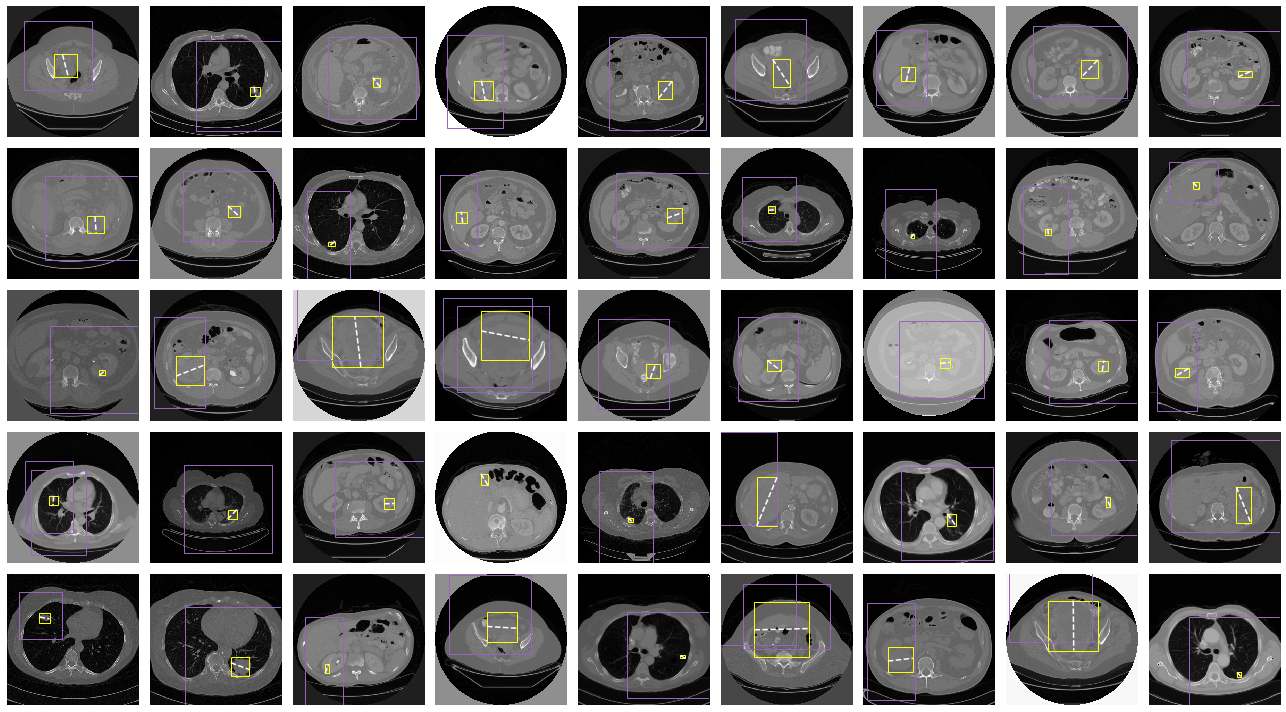

In [76]:
ids = np.arange(55, 100)
labels = "abcd"
subset = "test"

fig = plt.figure()
fig.set_size_inches(18, 10)
for i, id in enumerate(ids):
    img = imread("~/Data/bmi260/{}/{}.png".format(subset, str(id).zfill(6)))
    lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/{}/{}.txt".format(subset, str(id).zfill(6))).read().split()
    lw = 512 * float(lw)
    lh = 512 * float(lh)
    lx = 512 * float(lx) - 0.5*lw
    ly = 512 * float(ly) - 0.5*lh
    plt.subplot(5, 9, i+1)
    plt.imshow(img, cmap=cm.gray)
#     plt.text(20, 40, "({})".format(labels[i]), color="white", fontsize=12)
    plt.axis("off")
    ax = plt.gca()
    rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
    ax.add_patch(rect)
    xs, xe, ys, ye, anatomy = df_test.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
#     print("anatomy", anatomy)
    plt.plot([xs, xe], [ys, ye], "w--")
    my_df = df_det.query("id == {}".format(id))
    for j in range(len(my_df)):
        _, s, x, y, w, h = my_df.iloc[j]
        if s < s_cutoff:
            continue
        x = x - 0.5*w
        y = y - 0.5*h
        rect = Rectangle((x, y), w, h, fill=None, ec="C4")
        ax.add_patch(rect)
fig.tight_layout()
plt.savefig("select_test_results_gallery.png", dpi=300)

## Val

In [43]:
models = ["yolov4_3000", "yolov2_10000", "yolov3_ft_5000"]
df_models = dict()
for m in models:
    df_models[m] = pd.read_csv("results/bmi260_{}_val_valid.txt".format(m), delimiter=" ", names=["id", "score", "x", "y", "w", "h"])
df_models[m]

id     score           x           y           w           h
0     0  0.059886  199.077454  262.018555  280.319946  352.584595
1     0  0.004001  223.114578  282.747192  303.386780  335.350891
2     0  0.003861  364.421570  271.419830  425.492493  319.472260
3     0  0.003667  203.580597  274.581543  262.042419  322.635925
4     0  0.002416  227.144012  160.145462  317.369843  268.600037
..   ..       ...         ...         ...         ...         ...
450  98  0.004329  255.317551  191.404785  347.387817  292.082764
451  98  0.001306  195.705093  277.338654  244.723404  304.303131
452  99  0.017458   53.879242  196.634308  154.639481  286.787933
453  99  0.005836   70.948242  240.727158  133.380157  287.049713
454  99  0.001375   41.434837  159.648712  131.769653  263.058167

[455 rows x 6 columns]

In [44]:
df_val = pd.read_csv((os.path.join("/Users/liponan/Data/bmi260/rsna2017_{}.csv".format("val"))), index_col=0).reset_index(drop=True)
df_val.query("anatomy == 'Liver'")

order anatomy                                          seriesUID  \
25   1313   Liver  1.3.6.1.4.1.14519.5.2.1.1079.4008.197640174959...   
39   1665   Liver  1.3.6.1.4.1.14519.5.2.1.1079.4008.972951195130...   
46   1813   Liver  1.3.6.1.4.1.14519.5.2.1.3344.4008.504589444775...   
74    967   Liver  1.3.6.1.4.1.14519.5.2.1.3344.4008.508067462958...   
99    137   Liver  1.3.6.1.4.1.14519.5.2.1.1079.4008.118291050558...   

       patientID                                        instanceUID  \
25  TCGA-G3-A25X  1.3.6.1.4.1.14519.5.2.1.1079.4008.315752384736...   
39  TCGA-G3-A6UC  1.3.6.1.4.1.14519.5.2.1.1079.4008.114639881390...   
46  TCGA-DD-A4NE  1.3.6.1.4.1.14519.5.2.1.3344.4008.246672049110...   
74  TCGA-DD-A4NO  1.3.6.1.4.1.14519.5.2.1.3344.4008.278846694669...   
99  TCGA-G3-A3CI  1.3.6.1.4.1.14519.5.2.1.1079.4008.141460873488...   

       length     start_x     start_y       end_x       end_y  ...  \
25  87.566608  385.734417  337.170732  366.308943  198.417344  ...   
39  58.286047  160.388950  228.764641   82.316022  220.278453  ...   
46  84.906377  145.679558  228.764641  121.918232  341.913812  ...   
74  10.859832  371.412155  324.941437  383.292818  321.546961  ...   
99  49.958319  120.786740  272.892818   66.475138  259.880663  ...   

                  SOPClassUID sliceIndexOneBased  \
25  1.2.840.10008.5.1.4.1.1.2                  1   
39  1.2.840.10008.5.1.4.1.1.2                 48   
46  1.2.840.10008.5.1.4.1.1.2                 20   
74  1.2.840.10008.5.1.4.1.1.2                 85   
99  1.2.840.10008.5.1.4.1.1.2                 26   

                                             filename     PatientID  \
25  /Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-G3-A25...  TCGA-G3-A25X   
39  /Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-G3-A6U...  TCGA-G3-A6UC   
46  /Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-DD-A4N...  TCGA-DD-A4NE   
74  /Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-DD-A4N...  TCGA-DD-A4NO   
99  /Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-G3-A3C...  TCGA-G3-A3CI   

    InstanceNumber                                  SeriesInstanceUID  \
25               1  1.3.6.1.4.1.14519.5.2.1.1079.4008.197640174959...   
39              48  1.3.6.1.4.1.14519.5.2.1.1079.4008.972951195130...   
46              20  1.3.6.1.4.1.14519.5.2.1.3344.4008.504589444775...   
74              85  1.3.6.1.4.1.14519.5.2.1.3344.4008.508067462958...   
99              26  1.3.6.1.4.1.14519.5.2.1.1079.4008.118291050558...   

                                   StudyInstanceUID_y  center_x  center_y  \
25  1.3.6.1.4.1.14519.5.2.1.1079.4008.179813634120...  0.734417  0.523035   
39  1.3.6.1.4.1.14519.5.2.1.1079.4008.273569008619...  0.237017  0.438519   
46  1.3.6.1.4.1.14519.5.2.1.3344.4008.217069790726...  0.261326  0.557303   
74  1.3.6.1.4.1.14519.5.2.1.3344.4008.226816019260...  0.737017  0.631336   
99  1.3.6.1.4.1.14519.5.2.1.1079.4008.324693330665...  0.182873  0.520287   

    subset  
25     val  
39     val  
46     val  
74     val  
99     val  

[5 rows x 28 columns]

anatomy Renal
yolov4_3000 1
yolov2_10000 1
yolov3_ft_5000 1


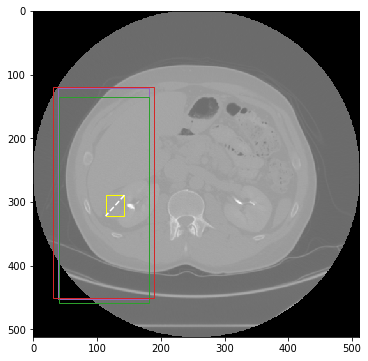

In [45]:
id = 92 # 3, 0, 4, 99
subset = "val"
s_cutoff = 0.25
colors = ["C4", "C2", "C3"]


img = imread("~/Data/bmi260/{}/{}.png".format(subset, str(id).zfill(6)))
lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/{}/{}.txt".format(subset, str(id).zfill(6))).read().split()
lw = 512 * float(lw)
lh = 512 * float(lh)
lx = 512 * float(lx) - 0.5*lw
ly = 512 * float(ly) - 0.5*lh
fig = plt.figure()
fig.set_size_inches(6, 6)
plt.imshow(img, cmap=cm.gray)
ax = plt.gca()
rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
ax.add_patch(rect)
xs, xe, ys, ye, anatomy = df_val.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
print("anatomy", anatomy)
plt.plot([xs, xe], [ys, ye], "w--")
for j, m in enumerate(models):
    my_df = df_models[m].query("id == {} and score > {}".format(id, s_cutoff))
    print(m, len(my_df))
    for i in range(len(my_df)):
        _, s, x, y, w, h = my_df.iloc[i]
        x = x - 0.5*w
        y = y - 0.5*h
        rect = Rectangle((x, y), w, h, fill=None, ec=colors[j])
        ax.add_patch(rect)


anatomy Renal
yolov4_3000 1
yolov2_10000 1
yolov3_ft_5000 1
anatomy Ovarian
yolov4_3000 1
yolov2_10000 1
yolov3_ft_5000 0
anatomy Lung
yolov4_3000 1
yolov2_10000 2
yolov3_ft_5000 1
anatomy Liver
yolov4_3000 2
yolov2_10000 1
yolov3_ft_5000 0


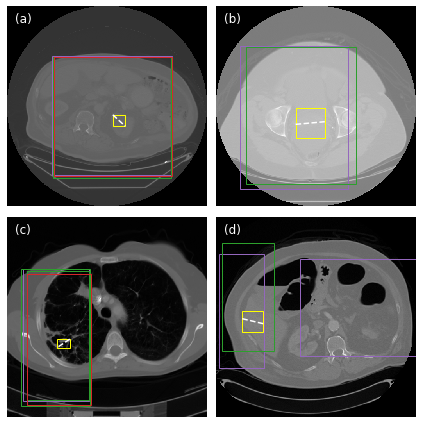

In [46]:
ids = [3, 0, 4, 99]
labels = "abcd"
subset = "val"

fig = plt.figure()
fig.set_size_inches(6, 6)
for i, id in enumerate(ids):
    img = imread("~/Data/bmi260/{}/{}.png".format(subset, str(id).zfill(6)))
    lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/{}/{}.txt".format(subset, str(id).zfill(6))).read().split()
    lw = 512 * float(lw)
    lh = 512 * float(lh)
    lx = 512 * float(lx) - 0.5*lw
    ly = 512 * float(ly) - 0.5*lh
    plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap=cm.gray)
    plt.text(20, 40, "({})".format(labels[i]), color="white", fontsize=12)
    plt.axis("off")
    ax = plt.gca()
    rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
    ax.add_patch(rect)
    xs, xe, ys, ye, anatomy = df_val.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
    print("anatomy", anatomy)
    plt.plot([xs, xe], [ys, ye], "w--")
    for j, m in enumerate(models):
        my_df = df_models[m].query("id == {} and score > {}".format(id, s_cutoff))
        print(m, len(my_df))
        for k in range(len(my_df)):
            _, s, x, y, w, h = my_df.iloc[k]
            x = x - 0.5*w
            y = y - 0.5*h
            rect = Rectangle((x, y), w, h, fill=None, ec=colors[j])
            ax.add_patch(rect)
fig.tight_layout()
plt.savefig("select_val_results.png", dpi=300)

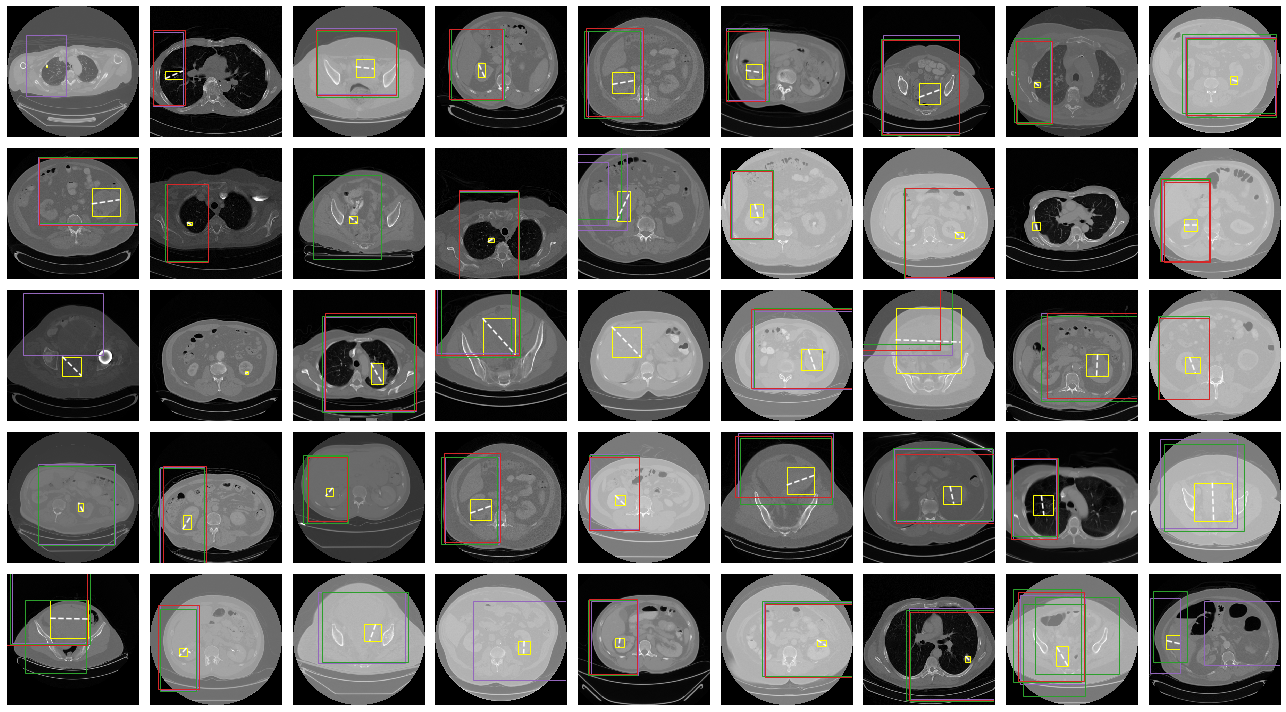

In [50]:
ids = np.arange(55, 100)
labels = "abcd"
subset = "val"

fig = plt.figure()
fig.set_size_inches(18, 10)
for i, id in enumerate(ids):
    img = imread("~/Data/bmi260/{}/{}.png".format(subset, str(id).zfill(6)))
    lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/{}/{}.txt".format(subset, str(id).zfill(6))).read().split()
    lw = 512 * float(lw)
    lh = 512 * float(lh)
    lx = 512 * float(lx) - 0.5*lw
    ly = 512 * float(ly) - 0.5*lh
    plt.subplot(5, 9, i+1)
    plt.imshow(img, cmap=cm.gray)
#     plt.text(20, 40, "({})".format(labels[i]), color="white", fontsize=12)
    plt.axis("off")
    ax = plt.gca()
    rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
    ax.add_patch(rect)
    xs, xe, ys, ye, anatomy = df_val.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
#     print("anatomy", anatomy)
    plt.plot([xs, xe], [ys, ye], "w--")
    for j, m in enumerate(models):
        my_df = df_models[m].query("id == {} and score > {}".format(id, s_cutoff))
#         print(m, len(my_df))
        for k in range(len(my_df)):
            _, s, x, y, w, h = my_df.iloc[k]
            x = x - 0.5*w
            y = y - 0.5*h
            rect = Rectangle((x, y), w, h, fill=None, ec=colors[j])
            ax.add_patch(rect)
fig.tight_layout()
plt.savefig("select_val_results_gallery.png", dpi=300)

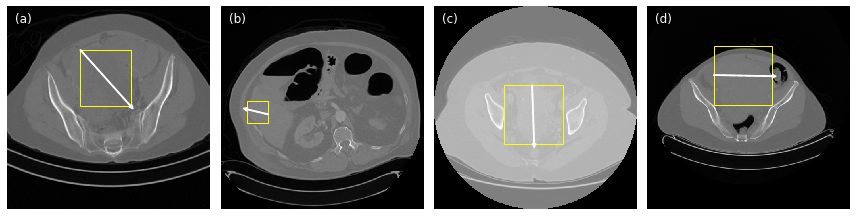

In [69]:
ids = [76, 99, 90, 91]
labels = "abcd"

fig = plt.figure()
fig.set_size_inches(12, 6)
for i, id in enumerate(ids):
    img = imread("~/Data/bmi260/{}/{}.png".format(subset, str(id).zfill(6)))
    lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/{}/{}.txt".format(subset, str(id).zfill(6))).read().split()
    lw = 512 * float(lw)
    lh = 512 * float(lh)
    lx = 512 * float(lx) - 0.5*lw
    ly = 512 * float(ly) - 0.5*lh
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap=cm.gray)
    
    plt.axis("off")
    ax = plt.gca()
    rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
    ax.add_patch(rect)
    xs, xe, ys, ye, anatomy = df_val.iloc[id][["start_x", "end_x", "start_y", "end_y", "anatomy"]]
    plt.plot([xs, xe], [ys, ye], "w--")
    plt.arrow(xs, ys, xe-xs, ye-ys, color="white", linewidth=1,
              width=2, head_width=10, head_length=10, shape="full", linestyle="-")
#     plt.text(20, 40, "{}".format(anatomy), color="white", fontsize=12)
    plt.text(20, 40, "({})".format(labels[i]), color="white", fontsize=12)
fig.tight_layout()
plt.savefig("select_val_labels_horizon.png", dpi=300)